# Exercises in Classification II

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

## Exercise 1

In this exercise, we look at the titanic dataset, which is on Moodle in the file "titanic_survival_data.csv". 

Answer the following questions:
1. Load in the dataset, replace the missing values in the age column by the mean age of the column, and encode the Sex column as 0 and 1s.
2. Make an X set of the variables "Pclass", "Sex", "Age" and "SibSp", and take Survived as the y variable. Then make train-test split with 20% of the dataset for testing.
3. Do MinMax scaling on the training dataset.
5. Use 10-fold cross-validation on the training set to train different KNN algorithms and chose a suitable K based on accuracy score.
6. For the chosen K, train a model on the entire training dataset.
7. Create a confusion matrix for the model trained in 4 and calculate accuracy, precision, recall, and F1 score on the test dataset.
8. OPTIONAL: Create a ROC curve for the test dataset as well as the AUC score
9. OPTIONAL: Can you use 10-fold cross validation to get an estimate of the recall instead of accuracy?

### 1. Load in the dataset, replace the missing values in the age column by the mean age of the column, and encode the Sex column as 0 and 1s.

In [26]:
df_titan = pd.read_csv("../Notebooks and data-8/titanic_survival_data.csv")
df_titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.000,S
887,1,1,female,19.0,0,0,30.000,S
888,0,3,female,NaN,1,2,23.450,S
889,1,1,male,26.0,0,0,30.000,C


In [27]:
df_titan.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,868.000000
mean,0.383838,2.308642,29.679272,0.523008,0.381594,91.288425
std,0.486592,0.836071,14.536483,1.102743,0.806057,159.991488
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,10.500000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,27.825000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,78.958000
max,1.000000,3.000000,80.000000,8.000000,6.000000,910.792000


In [28]:
df_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      868 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [39]:
df_titan.isna().sum()

Survived     1
Pclass       1
Sex          0
Age          1
SibSp        1
Parch        1
Fare        24
Embarked     3
dtype: int64

In [30]:
df_titan["Age"].mean()

29.679271708683473

In [31]:
#df_titan["Age"] = df_titan["Age"].fillna(df_titan["Age"].mean()) # it works but it throws error
#df_titan["Age"].map({Nan: df_titan["Age"].mean()})
df_titan["Age"].fillna(df_titan["Age"].mean()) # not need to assign

In [38]:
df_titan["Sex"] = pd.get_dummies(df_titan["Sex"], drop_first=True, dtype=int) # again error, how else are you supposed to do it?
#df_titan.loc["Sex"] = pd.get_dummies(df_titan["Sex"], drop_first=True, dtype=int)

C:\Users\Bruger\AppData\Local\Temp\ipykernel_15180\3109447042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titan["Sex"] = pd.get_dummies(df_titan["Sex"], drop_first=True, dtype=int) # again error, how else are you supposed to do it?


In [36]:
print(df_titan.duplicated().sum())

df_titan = df_titan.drop_duplicates()

print(df_titan.duplicated().sum())

114
0


In [42]:
print(df_titan.isna().sum())
df_titan = df_titan.dropna()
print(df_titan.isna().sum())

Survived     1
Pclass       1
Sex          0
Age          1
SibSp        1
Parch        1
Fare        24
Embarked     3
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [45]:
df_titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1,22.000000,1.0,0.0,7.250,S
1,1.0,1.0,0,38.000000,1.0,0.0,712.833,C
2,1.0,3.0,0,26.000000,0.0,0.0,7.925,S
3,1.0,1.0,0,35.000000,1.0,0.0,53.100,S
4,0.0,3.0,1,35.000000,0.0,0.0,8.050,S
...,...,...,...,...,...,...,...,...
885,0.0,3.0,0,39.000000,0.0,5.0,29.125,Q
887,1.0,1.0,0,19.000000,0.0,0.0,30.000,S
888,0.0,3.0,0,29.679272,1.0,2.0,23.450,S
889,1.0,1.0,1,26.000000,0.0,0.0,30.000,C


### 2. Make an X set of the variables "Pclass", "Sex", "Age" and "SibSp", and take Survived as the y variable. Then make train-test split with 20% of the dataset for testing.

In [52]:
X = df_titan[["Pclass", "Sex", "Age", "SibSp"]]
X.head(5)

,Pclass,Sex,Age,SibSp
0,3.0,1,22.0,1.0
1,1.0,0,38.0,1.0
2,3.0,0,26.0,0.0
3,1.0,0,35.0,1.0
4,3.0,1,35.0,0.0


In [51]:
y = df_titan[["Survived"]]
y.head(5)

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [58]:
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Do MinMax scaling on the training dataset.

In [59]:
scaler = MinMaxScaler()

In [94]:
X_titanic_train_scaled["Age"].value_counts()

Age
0.370991    83
0.300000    23
0.225000    21
0.375000    21
0.275000    21
            ..
1.000000     1
0.150000     1
0.737500     1
0.887500     1
0.662500     1
Name: count, Length: 72, dtype: int64

In [64]:
X_titanic_train_scaled = pd.DataFrame(scaler.fit_transform(X_titanic_train), columns=X_titanic_train.columns)
X_titanic_train_scaled

,Pclass,Sex,Age,SibSp
0,1.0,1.0,0.175000,0.500
1,1.0,0.0,0.300000,0.125
2,1.0,1.0,0.370991,0.000
3,1.0,1.0,0.325000,0.125
4,1.0,1.0,0.237500,0.000
...,...,...,...,...
596,1.0,1.0,0.400000,0.000
597,1.0,0.0,0.212500,0.000
598,1.0,1.0,0.287500,0.000
599,1.0,0.0,0.370991,0.000


### 4. Use 10-fold cross-validation on the training set to train different KNN algorithms and chose a suitable K based on accuracy score.

In [78]:
one_d_original = y["Survived"]

In [79]:
one_d = y_titanic_train["Survived"]

In [125]:
def knnSweepCrossValidation(X, y, maxK, folds=5):
    kacclist = []
    
    for k in range(2, maxK):
        knn = KNeighborsClassifier(n_neighbors=k)     
        scores = cross_val_score(knn, X, y, cv = folds)
        kacclist.append({"K": k, "CV accuracy": scores.mean()})

    return pd.DataFrame(kacclist)

In [126]:
CV_acuracy_data = knnSweepCrossValidation(X_titanic_train_scaled, one_d, 25, 10) # MUST be on the training data

In [108]:
CV_acuracy_data

,K,CV accuracy
0,2,0.727022
1,3,0.718607
2,4,0.738661
3,5,0.741995
4,6,0.745355
5,7,0.755328
6,8,0.737022
7,9,0.768634
8,10,0.745410
9,11,0.737049


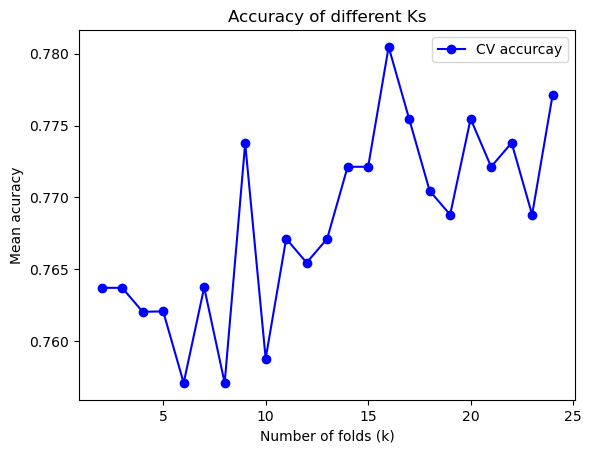

In [127]:
plt.plot(CV_acuracy_data["K"], CV_acuracy_data["CV accuracy"], label = "CV accurcay", color='blue', marker='o', linestyle='solid')    
plt.xlabel('Number of folds (k)')
plt.ylabel('Mean acuracy')
plt.title("Accuracy of different Ks")
plt.legend()

plt.show()

In [129]:
CV_acuracy_data[CV_acuracy_data["CV accuracy"] == CV_acuracy_data["CV accuracy"].max()]

,K,CV accuracy
14,16,0.780464


### 5. For the chosen K, train a model on the entire training dataset.

In [132]:
knn16 = KNeighborsClassifier(n_neighbors=16)

In [133]:
knn16.fit(X_titanic_train_scaled, one_d)

KNeighborsClassifier(n_neighbors=16)

In [134]:
y_pred_train = knn16.predict(X_titanic_train) ## do the test on the normal or scalled data?
y_pred_test = knn16.predict(X_titanic_test) # look Evaluating classification

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.